# **Laboratorijska vježba 5**: Zadaci za samostalni rad

## **Predviđanje prodaje iz troškova oglasa**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o oglasima u kojima se prodaju određeni proizvodi, a objavljuju se na medijima poput TV-a, radija i novina. Skup podataka sadrži sljedeće stupce:

* TV - cijena za oglašavanje na TV-u za jedan proizvod na određenom tržištu (u tisućama dolara).
* Radio - cijena za oglašavanje na radiju za isti proizvod.
* Newspaper - cijena za oglašavanje u novinama za isti proizvod.
* Sales - prodaja jednog proizvoda na određenom tržištu (u tisućama jedinica).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('Data/Advertising.csv', index_col=0)
data.head()
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## **Zadatak 1: Linearna regresija: predviđanje prodaje iz troškova oglasa**

Podijelite skup podataka na podskupove za trening i test. Definirajte model linearne regresije pomoću svih značajki, bez izvođenja bilo kakvih transformacija nad značajkama. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [42]:
X = data[['TV', 'radio','newspaper']]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_train_predict = model.predict(X_train)
print(f'MSE za trening: {mean_squared_error(y_train, y_train_predict)}')

y_test_predict = model.predict(X_test)
print(f'MSE za test: {mean_squared_error(y_test, y_test_predict)}')

#veći MSE (Mean squared error je za testni model(zato sto je manje podataka valjda))

MSE za trening: 2.4793551789057866
MSE za test: 3.79679723671522




```
## Ovo je oblikovano kao kôd
```

Ispišite jednadžbu modela koristeći izračunate koeficijente.

In [45]:
feature_cols = data.columns[:-1]

for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)

0.04405928095746522 * TV + 
0.19928749689893954 * radio + 
0.006882452222275487 * newspaper + 
2.7089490925159065


Nacrtajte dijagram raspršenosti između stvarnih i predviđenih vrijednosti izlazne varijable za podskupove za trening i test.

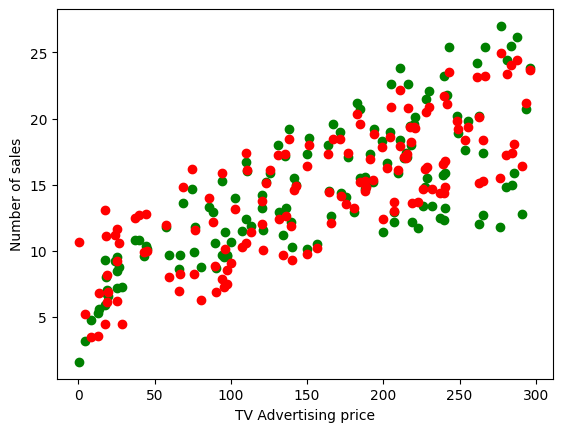

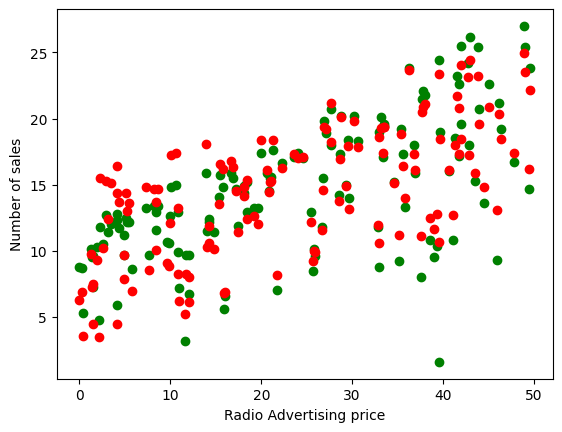

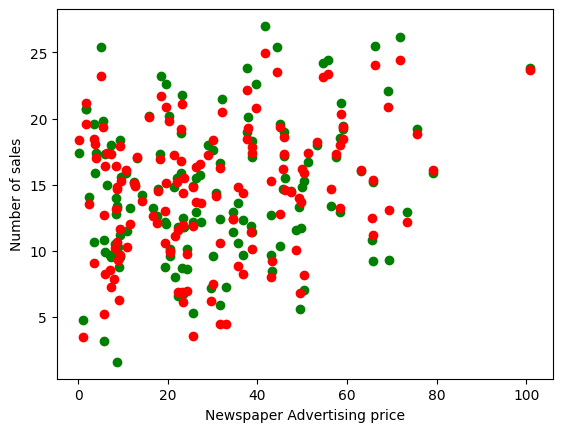

In [46]:
# plt.scatter(X_train['TV'], y_train, c='g')
# plt.scatter(X_train['TV'], y_train_predict, c='r')

# plt.scatter(X_train['radio'], y_train, c='g')
# plt.scatter(X_train['radio'], y_train_predict, c='r')

# plt.scatter(X_train['newspaper'], y_train, c='g')
# plt.scatter(X_train['newspaper'], y_train_predict, c='r')

# plt.xlabel('Advertising price')
# plt.ylabel('Number of sales')
# plt.show()

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(X_train['TV'], y_train, c='g')
ax1.scatter(X_train['TV'], y_train_predict, c='r')
ax1.set_xlabel('TV Advertising price')
ax1.set_ylabel('Number of sales')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(X_train['radio'], y_train, c='g')
ax2.scatter(X_train['radio'], y_train_predict, c='r')
ax2.set_xlabel('Radio Advertising price')
ax2.set_ylabel('Number of sales')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(X_train['newspaper'], y_train, c='g')
ax3.scatter(X_train['newspaper'], y_train_predict, c='r')
ax3.set_xlabel('Newspaper Advertising price')
ax3.set_ylabel('Number of sales')

plt.show()

## **Zadatak 2: Nelinearna regresija: predviđanje prodaje iz troškova oglasa**

Definirajte model nelinearne (polinomijalne) regresije sa stupnjem polinoma 2, 3, 5 i 10 bez uključivanja interakcijskih članova. Koristite klasu PolynomialFeatures iz modula preprocessing iz biblioteke scikit-learn. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [49]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 5, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mse_train_ar = []
mse_test_ar = []
for degree in degrees:
    poly = PolynomialFeatures(degree)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression().fit(X_train_poly, y_train)
    
    # predviđanje na skupu za trening
    y_train_pred = model.predict(X_train_poly)
    
    # izračun MSE na skupu za trening
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_train_ar.append(mse_train)
    print(f"MSE trening ({degree} stupnja): {mse_train}")
    
    # predviđanje na skupu za testiranje
    y_test_pred = model.predict(X_test_poly)
    
    # izračun MSE na skupu za testiranje
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_test_ar.append(mse_test)
    print(f"MSE testiranje ({degree} stupnja): {mse_test}")

MSE trening (2 stupnja): 0.35410977541934024
MSE testiranje (2 stupnja): 0.5231944949055658
MSE trening (3 stupnja): 0.21984452631177434
MSE testiranje (3 stupnja): 0.29077449153131163
MSE trening (5 stupnja): 0.14980929022223635
MSE testiranje (5 stupnja): 46.96618991927361
MSE trening (10 stupnja): 0.02483210520179272
MSE testiranje (10 stupnja): 253620947145.9207


Iscrtajte izračunate vrijednosti MSE (na treningu i 

*   Stavka na popisu
*   Stavka na popisu

testu) u ovisnosti o složenosti modela. Koristite linijski dijagram. 

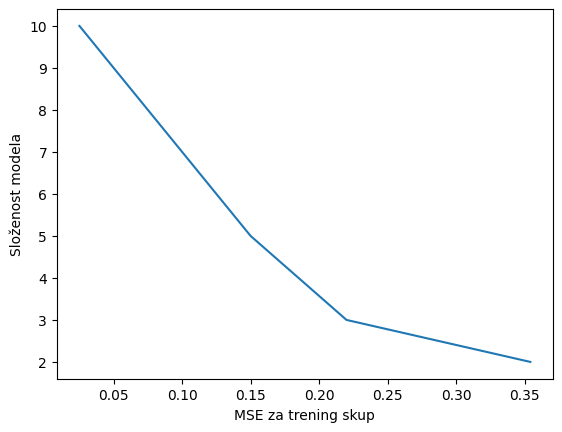

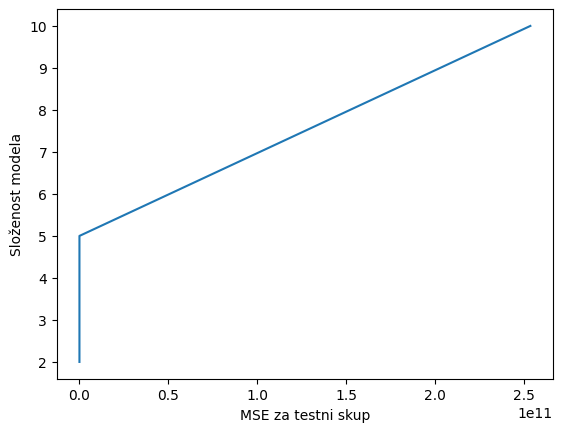

In [61]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(mse_train_ar, [2,3,5,10])
ax1.set_xlabel('MSE za trening skup')
ax1.set_ylabel('Složenost modela')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(mse_test_ar, [2,3,5,10])
ax2.set_xlabel('MSE za testni skup')
ax2.set_ylabel('Složenost modela')
plt.show()


Ovaj put uključite interakcijske članove te ponovite 
treniranje i računanje mjere MSE.

In [62]:
degrees = [2, 3, 5, 10]

for degree in degrees:
    poly = PolynomialFeatures(degree, interaction_only=True)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression().fit(X_train_poly, y_train)
    
    # predviđanje na skupu za trening
    y_train_pred = model.predict(X_train_poly)
    
    # izračun MSE na skupu za trening
    mse_train = mean_squared_error(y_train, y_train_pred)
    print(f"MSE trening ({degree} stupnja): {mse_train}")
    
    # predviđanje na skupu za testiranje
    y_test_pred = model.predict(X_test_poly)
    
    # izračun MSE na skupu za testiranje
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"MSE testiranje ({degree} stupnja): {mse_test}")

MSE trening (2 stupnja): 0.8476116596934253
MSE testiranje (2 stupnja): 1.007630507076708
MSE trening (3 stupnja): 0.8282466554598642
MSE testiranje (3 stupnja): 1.1532864903357123
MSE trening (5 stupnja): 0.8282466554598642
MSE testiranje (5 stupnja): 1.1532864903357123
MSE trening (10 stupnja): 0.8282466554598642
MSE testiranje (10 stupnja): 1.1532864903357123


Komentirajte dobivene rezultate. Koji model ima najbolje performanse na podskupu za trening, a koji na testu? Je li za ovaj problem prikladnija polinomijalna regresija od linearne regresije? Imaju li utjecaj interakcijski članovi na performanse modela?

## **Zadatak 3: Preslikavanje u prostor značajki**

Umjesto uvođenja novih (nelinearnih) značajki u model, pokušajte transformirati postojeće značajke. Za početak, za svaku značajku u skupu podataka (TV, Radio, Newspaper), vizualizirajte njezinu vezu s izlaznom varijablom (Sales) pomoću dijagrama raspršenosti. 

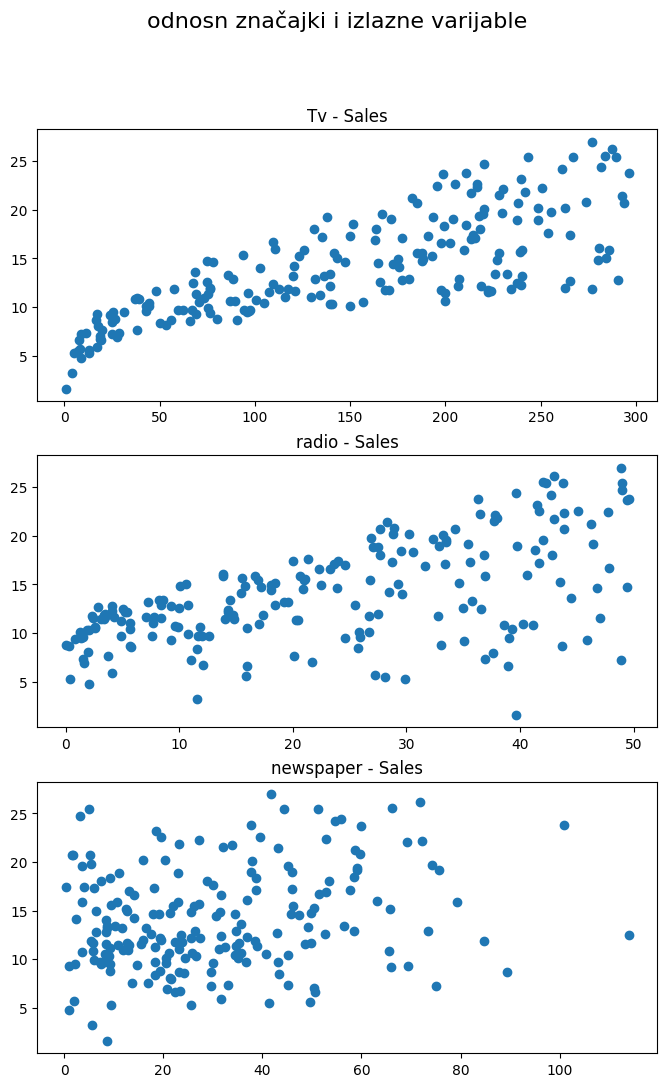

In [72]:
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# ax1.scatter(X['TV'],y)

# ax2 = fig1.add_subplot(122)
# ax2.scatter(X['radio'],y) 
# plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,12))

ax1.scatter(X['TV'],y)
ax1.set_title('Tv - Sales')

ax2.scatter(X['radio'],y) 
ax2.set_title('radio - Sales')

ax3.scatter(X['newspaper'],y)
ax3.set_title('newspaper - Sales')

fig.suptitle('odnosn značajki i izlazne varijable', fontsize=16)

plt.show()

Na temelju ovih dijagrama, pokušajte zaključiti kakva je veza svake značajke i izlazne varijable. Pokušajte isprobati neke transformacije nad postojećim značajkama za koje mislite da će njihovu vezu nad izlaznom varijablom svesti u linearan oblik (primjerice, potenciranje, korjenovanje, logaritmiranje, ...).

In [ ]:
# Mjesto za Vaš kod

Ponovno vizualizirajte vezu između svake (sada transformirane) značajke i izlazne varijable te provjerite je li došlo do kakvih promjena. Istrenirajte model linearne regresije s takvim značajkama te ga istrenirajte na podskupu za trening. Izračunajte MSE na podskupovima za trening i test. 

In [ ]:
# Mjesto za Vaš kod

Jeste li uspjeli pronaći neku transformaciju koja poboljšava performanse modela linearne regresije? Prokomentirajte dobivene rezultate.

## **Zadatak 4: Regularizacija**

Kako biste ublažili prenaučenost modela, isprobajte učinak reguralizacije. Testirajte učinak L1 (Lasso) i L2 (Ridge) regularizacije iz biblioteke scikit-learn za gore definirane linearne i nelinearne modele. Možete odabrati najbolji model linearne i najbolji model nelinearne regresije od gore testiranih. Isprobajte nekoliko vrijednosti za parametar $\lambda$. Izračunajte MSE za podskupove za trening i test.


In [ ]:
# Mjesto za Vaš kod

Prokomentirajte dobivene rezultate. Ima li uvođenje regularizacije učinak na performanse modela linearne i nelinearne regresije za promatrani problem?

## **Zadatak 5: Drugi algoritmi za regresiju**

U biblioteci scikit-learn postoje brojni drugi algoritmi strojnog učenja koji se mogu koristiti za potrebe regresije. Evaluirajte učinkovitost tih algoritma na promatranom problemu. Trenirajte modele SVR, DecisionTreeRegressor i KNeighborsRegressor sa zadanim postavkama parametara. Usporedite njihove performanse na podskupu za test s performansama gore definiranih modela regresije. Uz mjeru MSE, za usporedbu koristite i mjere RMSE i MAE.

In [ ]:
# Mjesto za Vaš kod